In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
import seaborn as sns

In [71]:
#Lendo dados
drogas_final = pd.read_csv('Dados/GESEG_SBX_DROGA_EXPORT.csv', encoding = 'latin-1', sep = ';', index_col=0)

In [72]:
drogas_final.head(10)

,ANO_OCOR,NRO_OCOR,NRO_INT_OBJETO,NRO_INT_TIPO_OBJETO,TIPO_OBJETO,QUANTIDADE,ATRIBUTO
ORGAO_OCOR,,,,,,,
100829,2021,1137,23703381,756,Cocaína,Grama,Unidade de Peso
151321,2020,1129,22817480,5,Maconha,Grama,Unidade de Peso
150808,2020,15392,23048116,5,Maconha,Verde,Cor Predominante
100510,2020,16612,23076594,756,Cocaína,4 pinos de cocaína pesando aproximadamente o t...,Descrição
151008,2019,2462,20497307,1025,Drogas,1,Quantidade de Unidade(s)
151008,2019,2462,20497307,1025,Drogas,Porção(es),Tipo de Embalagem
150808,2019,20501,21804599,5,Maconha,Verde,Cor Predominante
152308,2020,5394,23251372,1025,Drogas,01,Quantidade de Unidade(s)
151707,2019,4116,21639890,5,Maconha,Verde,Cor Predominante


In [73]:
#Pivotando valor "QUANTIDADE" da coluna "ATRIBUTOS" com o mesmo "NRO_INT_OBJETO"
drogas_final_pivot = drogas_final.pivot(index="NRO_INT_OBJETO", columns="ATRIBUTO", values="QUANTIDADE")

In [74]:
drogas_final_pivot.head()

ATRIBUTO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso
NRO_INT_OBJETO,,,,,,,
11228824,Amarelo,NaN,"0,42",NaN,4,Não soube informar,NaN
19338359,Verde,NaN,"2,20",NaN,1,Tijolo(s),Grama
19344958,Verde,NaN,"14,20",NaN,2,Porção(es),Grama
19352770,Branco,NaN,"0,80",NaN,1,Porção(es),Grama
19352780,Verde,NaN,"1,60",NaN,1,Cigarro(s),Grama


In [75]:
#Agrupando dados com o mesmo "K93_NRO_INT_OBJETO"
#Foi preciso utilizar "agg('min')" pois apenas groupby()...
#retorna um objeto iterável 
dg2_final = drogas_final[['NRO_INT_OBJETO','ANO_OCOR', 'NRO_OCOR','NRO_INT_TIPO_OBJETO','TIPO_OBJETO']].groupby(["NRO_INT_OBJETO"]).min()

In [76]:
dg2_final.head(10)

,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TIPO_OBJETO
NRO_INT_OBJETO,,,,
11228824,2009,3209,1025,Drogas
19338359,2018,3315,5,Maconha
19344958,2018,3319,5,Maconha
19352770,2018,3139,756,Cocaína
19352780,2018,3143,5,Maconha
19352781,2018,3143,5,Maconha
19359630,2018,2674,5,Maconha
19359634,2018,2675,5,Maconha
19359637,2018,2676,5,Maconha


In [77]:
#Ordenando por "K93_NRO_INT_OBJETO"
#Ordenação para facilitar a concatenação sem merge, ou join
dg2_final_sorted = dg2_final.sort_values(by=['NRO_INT_OBJETO'])
drogas_pivot_final_sorted = drogas_final_pivot.sort_values(by=['NRO_INT_OBJETO'])

In [78]:
#Garantia de mesmo numero de linhas para concatenação
display(dg2_final_sorted.shape, drogas_pivot_final_sorted.shape)

(113231, 4)

(113231, 7)

In [79]:
#Concatenando as duas tabelas
try_1_final = pd.concat([dg2_final_sorted, drogas_pivot_final_sorted],axis=1)

In [80]:
#Atribuindo a tabela resultado "try_1" com um index numérico
resultado = try_1_final.reset_index()

In [81]:
#Renomeando Coluans
resultado = resultado.rename(columns={"NRO_INT_OBJETO": "CHAVE_OBJETO", "TIPO_OBJETO": "TXT_TIPO_OBJETO"})

In [82]:
#Mostrando o resultado com descrição não nula
resultado[resultado['Descrição'].notnull()]

,CHAVE_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso
216,19903084,2018,4727,5,Maconha,Verde,"maconha prensada embalada em plastico, 5 gr","5,00","5,00",1,Pacote(s),Grama
217,19903086,2018,4727,5,Maconha,Verde,"maconha prensada embalada em plastico, 1,4 gr","1,40","1,40",1,Pacote(s),Grama
218,19903569,2018,6732,5,Maconha,Verde,Um porção de erva esverdeada semelhante a maco...,"2,40","2,40",1,Porção(es),Grama
219,19903819,2018,30412,5,Maconha,Verde,DOIS GRAMAS DE SUBSTANCIA ESVERDEADA DE ASPECT...,"2,00",NaN,3,Porção(es),Grama
220,19903932,2018,8070,1025,Drogas,Verde,uma pequena porção de erva de cor esverdeada s...,NaN,NaN,1,Porção(es),Miligrama
...,...,...,...,...,...,...,...,...,...,...,...,...
113224,24126924,2021,11681,757,Crack,Bege,2 PEDRAS DE CRACK,NaN,NaN,2,Porção(es),NaN
113225,24126925,2021,11681,756,Cocaína,Branco,102 PINOS DE COCAÍNA,NaN,NaN,102,Porção(es),NaN
113228,24126984,2021,8335,756,Cocaína,Branco,aproximadamente 23 gramas de pinos de cocaína,NaN,NaN,36,Unidade(s),Grama
113229,24127010,2021,14951,5,Maconha,Verde,Um tijolo de erva verde semelhante a maconha p...,"642,00",NaN,1,Tijolo(s),Grama


In [83]:
#Mudando o float do padrão brasileiro para o americano
#Criando novas colunas de Peso para analise e diferenciação de valores entre nova e antiga

resultado['Novo Peso Unitário'] = pd.to_numeric(resultado['Peso Unitário'].str.replace(',','.'), errors='coerce',downcast="float")
resultado['Novo Peso Total'] = pd.to_numeric(resultado['Peso Total'].str.replace(',','.'), errors='coerce',downcast="float")

#Trocando dados NaN por 0
resultado['Novo Peso Unitário'] = resultado['Novo Peso Unitário'].fillna(0)
resultado['Novo Peso Total'] = resultado['Novo Peso Total'].fillna(0)


#Trocando o tipo de dado para float
resultado['Novo Peso Total']  = resultado['Novo Peso Total'].astype(float)
resultado['Novo Peso Unitário']  = resultado['Novo Peso Unitário'].astype(float)

In [84]:
#Mostrar mudança nas colunas peso
resultado.head(10)

,CHAVE_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso,Novo Peso Unitário,Novo Peso Total
0,11228824,2009,3209,1025,Drogas,Amarelo,NaN,"0,42",NaN,4,Não soube informar,NaN,0.0,0.42
1,19338359,2018,3315,5,Maconha,Verde,NaN,"2,20",NaN,1,Tijolo(s),Grama,0.0,2.20
2,19344958,2018,3319,5,Maconha,Verde,NaN,"14,20",NaN,2,Porção(es),Grama,0.0,14.20
3,19352770,2018,3139,756,Cocaína,Branco,NaN,"0,80",NaN,1,Porção(es),Grama,0.0,0.80
4,19352780,2018,3143,5,Maconha,Verde,NaN,"1,60",NaN,1,Cigarro(s),Grama,0.0,1.60
5,19352781,2018,3143,5,Maconha,Verde,NaN,"1,10",NaN,1,Porção(es),Grama,0.0,1.10
6,19359630,2018,2674,5,Maconha,Verde,NaN,"1,00",NaN,1,Cigarro(s),Grama,0.0,1.00
7,19359634,2018,2675,5,Maconha,Verde,NaN,"30,50",NaN,1,Tijolo(s),Grama,0.0,30.50
8,19359637,2018,2676,5,Maconha,Verde,NaN,"1,20",NaN,1,Porção(es),Grama,0.0,1.20
9,19359638,2018,2676,5,Maconha,Verde,NaN,"0,40",NaN,1,Cigarro(s),Grama,0.0,0.40


# <h1><center>TIPO DE OBJETO</center></h1>

In [85]:
#Código Original copiado
cores = resultado['TXT_TIPO_OBJETO'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]
cores1 = resultado['TXT_TIPO_OBJETO'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0][0]
                             })
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2['Crack']['%'] = cores2['C']['%']
cores2 = cores2.drop(['C'], axis = 1)
cores2

,Maconha,Drogas,Cocaína,Crack
Quantidade,41164,37528,20063,14476
%,0.36354,0.331429,0.177186,0.127845


In [86]:
tipo_objeto = resultado.groupby(["TXT_TIPO_OBJETO"]).size().reset_index(name="Quantidade").set_index("TXT_TIPO_OBJETO").sort_index()
tipo_objeto['Frequência'] = resultado['TXT_TIPO_OBJETO'].value_counts(normalize=True).sort_index()
tipo_objeto = tipo_objeto.T
tipo_objeto


TXT_TIPO_OBJETO,Cocaína,Crack,Drogas,Maconha
Quantidade,20063.000000,14476.000000,37528.000000,41164.00000
Frequência,0.177186,0.127845,0.331429,0.36354


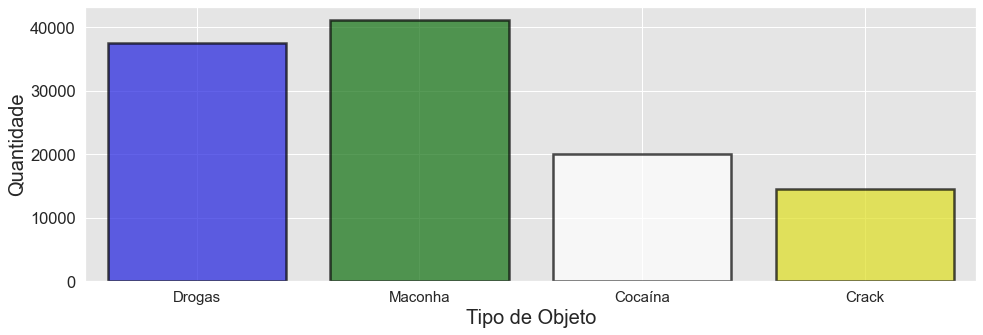

In [98]:
#Plotando gráficos
stores_df = resultado

palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
f, (ax3) = plt.subplots(1, 1, figsize=(14, 5))
sns.set(font_scale=1.5)

sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette, alpha = 0.7, linewidth=2.5, edgecolor=".0")
ax3.set_facecolor('#ababab')
ax3.patch.set_alpha(0.3)
ax3.set_xlabel("Tipo de Objeto",fontsize=20)
ax3.set_ylabel("Quantidade",fontsize=20)
ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 15)
plt.grid(axis='x')
plt.tight_layout()
#plt.title('Tipo de Objeto')

f.savefig('Tipo_objeto_Antes.png')

In [99]:
#Definindo uma series Drogas
#Como resultado do tipo de objeto de resultado = Drogas
Drogas = resultado.loc[resultado['TXT_TIPO_OBJETO'] == 'Drogas']

In [100]:
import unidecode

Drogas = resultado.loc[resultado['TXT_TIPO_OBJETO'] == 'Drogas']
Outras = resultado.loc[resultado['TXT_TIPO_OBJETO'] != 'Drogas']
Outras = Outras.reset_index(drop= True)

#DF com descrição nula
DrogasNA = Drogas.loc[Drogas['Descrição'].isnull()]
DrogasNA = DrogasNA.reset_index(drop=True)

#Excluindo descrição nula do DF Drogas
Drogas = Drogas.loc[Drogas['Descrição'].notna()]
Drogas = Drogas.reset_index(drop=True)

def changer(txt):
    return unidecode.unidecode(str(txt).replace(',','').replace('.',''))

Drogas['Descrição'] = Drogas['Descrição'].apply(changer)
    
Drogas['Descrição'] = Drogas['Descrição'].str.lower()

In [101]:
#Tratando ajustes de drogas

def analizer(x):
    
    if 'maconha' in x:
        return 'Maconha'
    elif 'canabis' in x:
        return 'Maconha'
    elif 'cannabis' in x:
        return 'Maconha'
    elif 'crack' in x:
        return 'Crack'
    elif 'cocaina' in x:
        return 'Cocaína'
    else:
        return 'Drogas'
    
Drogas['RECLASSIFICAÇÃO'] = Drogas['Descrição'].apply(analizer)

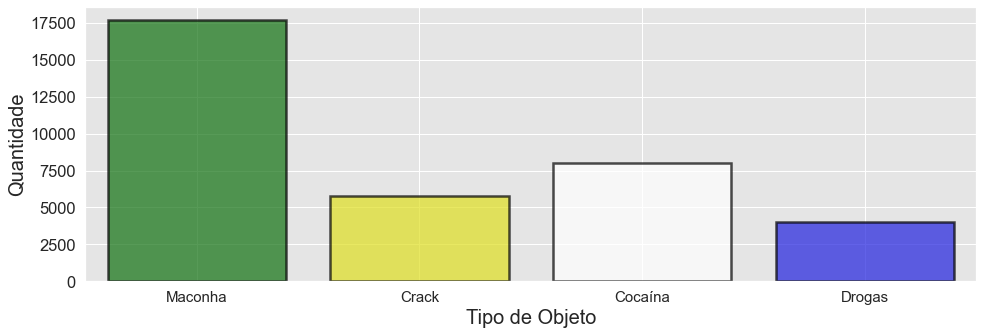

In [102]:
stores_df = Drogas

palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
f, (ax3) = plt.subplots(1, 1, figsize=(14, 5))
sns.set(font_scale=1.5)

sns.countplot(x="RECLASSIFICAÇÃO", data=stores_df, ax=ax3, palette= palette, alpha = 0.7, linewidth=2.5, edgecolor=".0")
ax3.set_facecolor('#ababab')
ax3.patch.set_alpha(0.3)
ax3.set_xlabel("Tipo de Objeto",fontsize=20)
ax3.set_ylabel("Quantidade",fontsize=20)
ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 15)

plt.grid(axis='x')
plt.tight_layout()
#plt.title('Tipo de Objeto')

f.savefig('Tipo_objeto_Depois.png')

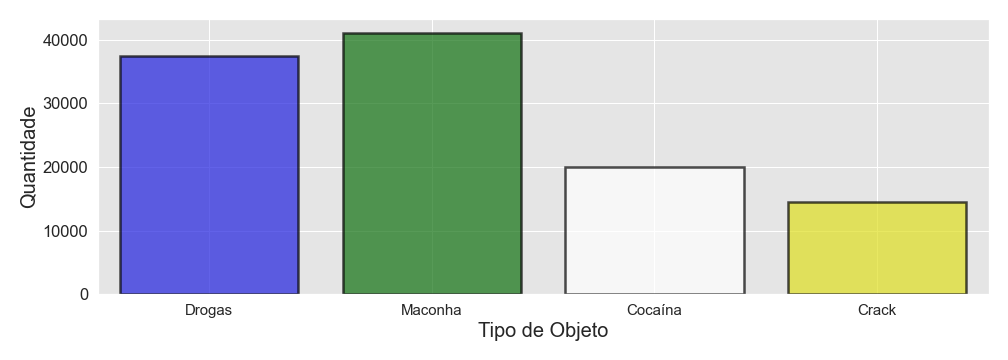

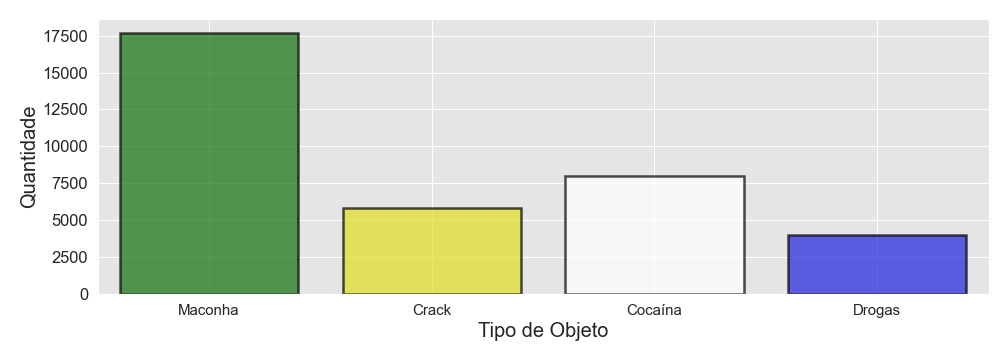

In [103]:
f1 = Image.open('Tipo_objeto_Antes.png')
f2 = Image.open('Tipo_objeto_Depois.png')
display(f1,f2)

In [104]:
cores = Drogas.groupby(['RECLASSIFICAÇÃO']).size().reset_index(name="Quantidade").set_index('RECLASSIFICAÇÃO').sort_index()
cores['Frequência'] = Drogas['RECLASSIFICAÇÃO'].value_counts(normalize=True).sort_index()
cores = cores.T
cores

RECLASSIFICAÇÃO,Cocaína,Crack,Drogas,Maconha
Quantidade,7999.000000,5806.000000,3999.000000,17710.000000
Frequência,0.225235,0.163485,0.112603,0.498677


In [95]:
resultado_final = pd.concat([Drogas, Outras])

In [96]:
resultado_final['RECLASSIFICAÇÃO'] = resultado_final['RECLASSIFICAÇÃO'].fillna(value=resultado_final.TXT_TIPO_OBJETO)

In [97]:
resultado_final = resultado_final.set_index('CHAVE_OBJETO')